# Does the normality of the marginal distribution of two variables cause these two variables to have a normal joint distribution?

<hr><hr><hr><br><br>

#### We want to show with an example, that simply having a normal distribution for each variable does not make these two variables have bivariate normal distribution.

<br><br>

$$
\begin{aligned} 
& X \sim \mathcal{N}(0, 1), \\
& Y = X \times (2B - 1), \quad B \sim \text{Bernulli}(\frac{1}{2}) \implies \\
& P(Y \leq y) = \frac{1}{2} \left\{P(Y \leq y | B = 1) + P(Y \leq y | B = 0)\right\} \\
& = \frac{1}{2}\left\{P(X \leq y) + P(-X \leq y)\right\}\\
& P(X \leq y) = \Phi(y), \\
& P (-X \leq y) = P(X \geq -y) = 1 - P(X \leq -y) = 1 - \Phi(-y) = \Phi(y) \implies \\
& P(Y \leq y) = \frac{1}{2} \left\{\Phi(y) + \Phi(y)\right\} = \Phi(y) \implies \\
& Y \sim \mathcal{N}(0, 1)
\end{aligned}
$$

<br>

It was found that according to the variable X distribution, both variables follow the standard normal distribution. But the question is, is the joint distribution of these two variables normal?

<br> 

Given that according to the definition of a normal co-distribution, any linear combination of marginal variables of the distribution must also be normal, so the sum of two variables must be normal. But it's clear that the distribution of the sum of these variables will not be normal. 

<hr>

$$
X + Y = \begin{cases} 
2X & \text{if} \quad B = 1, \\
0 & \text{if} \quad B = 0. 
\end{cases}
$$

<div class="alert alert-block alert-warning">
<b>Note:</b>  
According to the above proposition, it is clear that the distribution of the sum of a two variables is mixed with a normal variable with Mean of 4 and point mass at 0. Obviously, this distribution cannot be a bivariate normal distribution. So here we have given examples of two variables that the marginal distribution of both normal was standard. But the combined distribution was not a bivariate normal distribution. 
</div>


<div style = "color: darkblue; background-color: gray;">

Note: What is interesting here is that the linear correlation between the two variables is zero, but they are interdependent. That's exactly what we might forget a lot of the time, just having a normal distribution and not having correlations isn't enough to say that these two variables are independent. Rather, not having a normal co-distribution with it can ensure that the two variables are normal. 
</div>

$$
\begin{aligned}
& \text{Cov}(X, Y) = E(XY) - E(X) E(Y), \\
& E(XY) = E(E(XY |B)) = \frac{1}{2}\left\{(E(XY |B = 0)) + E(XY |B = 1)\right\} \\
& = \frac{1}{2} \left\{E(-X^2) + E(X^2)\right\} = 0 \implies \\
& \text{Cor}(X, Y) = 0. 
\end{aligned}
$$

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [32]:
class sim(): 
    def __init__(self, seed = 1234): 
        self.seed = seed
        
    def nsim(self, n): 
        self.n = n 

    def define_sim(self): 
        self.Joint_norm = stats.multivariate_normal(mean = [0, 
                                          0], 
                                  cov = [[1, 0], 
                                  [0, 1]],
                                  )
        self.xnorm = stats.norm(loc = 0, scale = 1)
        self.bvar = stats.bernoulli(p = 1/2)
    def get_sim(self): 
        self.Joint_normal = self.Joint_norm.rvs(random_state = self.seed, size = self.n)
        self.xvar = self.xnorm.rvs(size = self.n, random_state = self.seed)
        self.B = self.bvar.rvs(size = self.n, random_state = self.seed)
        self.yvar = self.xvar * (2 * self.B -1)
    def get_simData(self): 
        return {'Jonint_normal': self.Joint_normal, 
                'X': self.xvar, 
                'Y': self.yvar, 
                'B': self.B}
    def get_result(self): 
        return {'CorrMat': np.corrcoef(self.xvar, self.yvar), 
                'MeanY': self.yvar.mean(), 
                'VarY': self.yvar.var(), 
                'VarX': self.xvar.var(), 
                'MeanX': self.xvar.mean()}
    def get_plot(self, col1 = 'red', col2 = 'blue'): 
        xx1 = np.linspace(self.xvar.min(), self.xvar.max(), 100)
        yy1 = np.linspace(self.yvar.min(), self.yvar.max(), 100)
        xx2 = np.linspace(self.Joint_normal[:, 0].min(), self.Joint_normal[:, 0].max(), 100)
        yy2 = np.linspace(self.Joint_normal[:, 1].min(), self.Joint_normal[:, 1].max(), 100)
        XX1, YY1 = np.meshgrid(xx1, yy1)
        XX2, YY2 = np.meshgrid(xx2, yy2)
        dat1 = np.vstack([XX1.ravel(), YY1.ravel()])
        dat2 = np.vstack([XX2.ravel(), YY2.ravel()])
        kde1 = gaussian_kde([self.xvar, self.yvar])
        kde2 = gaussian_kde([self.Joint_normal[:, 0], self.Joint_normal[:, 1]])
        Z1 = kde1(dat1).reshape(XX1.shape)
        Z2 = kde2(dat2).reshape(XX2.shape)
        

        
        fig, ax = plt.subplots(3, 2, figsize = [16, 24])
        ax[0, 0].scatter(self.xvar, self.yvar, color = col1)
        ax[0, 0].set_title(r"$Y = (2B -1) \times X$")
        ax[0, 0].set_xlabel(r'$X$')
        ax[0, 0].set_ylabel(r'$Y$')
        ax[0, 1].scatter(self.Joint_normal[:, 0], 
                         self.Joint_normal[:, 1], color = col2)
        ax[0, 1].set_title(r"$X, Y \overset{iid}{\sim} N_2 (\mu_1: 0, \mu_2: 0, \sigma_1: 1, \sigma_2: 1, \rho = 0)$") 
        ax[0, 1].set_xlabel(r'$X$')
        ax[0, 1].set_ylabel(r'$Y$')
        
        
        fig1 = ax[1, 0].contourf(XX1, YY1, Z1, levels = 50, cmap = 'viridis')
        ax[1, 0].set_xlabel(r'$X$')
        ax[1, 0].set_ylabel(r'$Y$')
        ax[1, 0].set_title(r"$\text{Contour Plot of }:~ Y = (2B -1) \times X$")
        fig.colorbar(fig1, ax = ax[1, 0])
        
        fig2 = ax[1, 1].contourf(XX2, YY2, Z2, levels = 50, cmap = 'viridis')
        ax[1, 1].set_xlabel(r'$X$')
        ax[1, 1].set_ylabel(r'$Y$')
        ax[1, 1].set_title(r"$\text{Contour Plot of }: ~X, Y \overset{iid}{\sim} N_2 (\mu_1: 0, \mu_2: 0, \sigma_1: 1, \sigma_2: 1, \rho = 0)$")
        fig.colorbar(fig2, ax = ax[1, 1])
        
        ax[2, 0].hist(self.yvar + self.xvar, color = 'orange', 
                      density = True)
        zz = self.xvar + self.yvar
        temp1 = np.linspace(zz.min(), zz.max(), 100)
        temp2 = stats.norm.pdf(temp1, loc = 0, scale = 2)
        ax[2, 0].set_title(r'$\text{Histogram of}: ~ X + Y$')
        ax[2, 0].plot(temp1, temp2, color = 'violet')
        plt.show()
        
        
        
    
        

In [33]:
mysim = sim(1324)
mysim.nsim(int(1e+5))
mysim.define_sim()
mysim.get_sim() 
data_result = mysim.get_simData()
result = mysim.get_result()

In [34]:
result

{'CorrMat': array([[ 1.        , -0.00401026],
        [-0.00401026,  1.        ]]),
 'MeanY': -0.008268665153101084,
 'VarY': 0.998407264118038,
 'VarX': 0.9984294794947257,
 'MeanX': -0.006793780002800287}

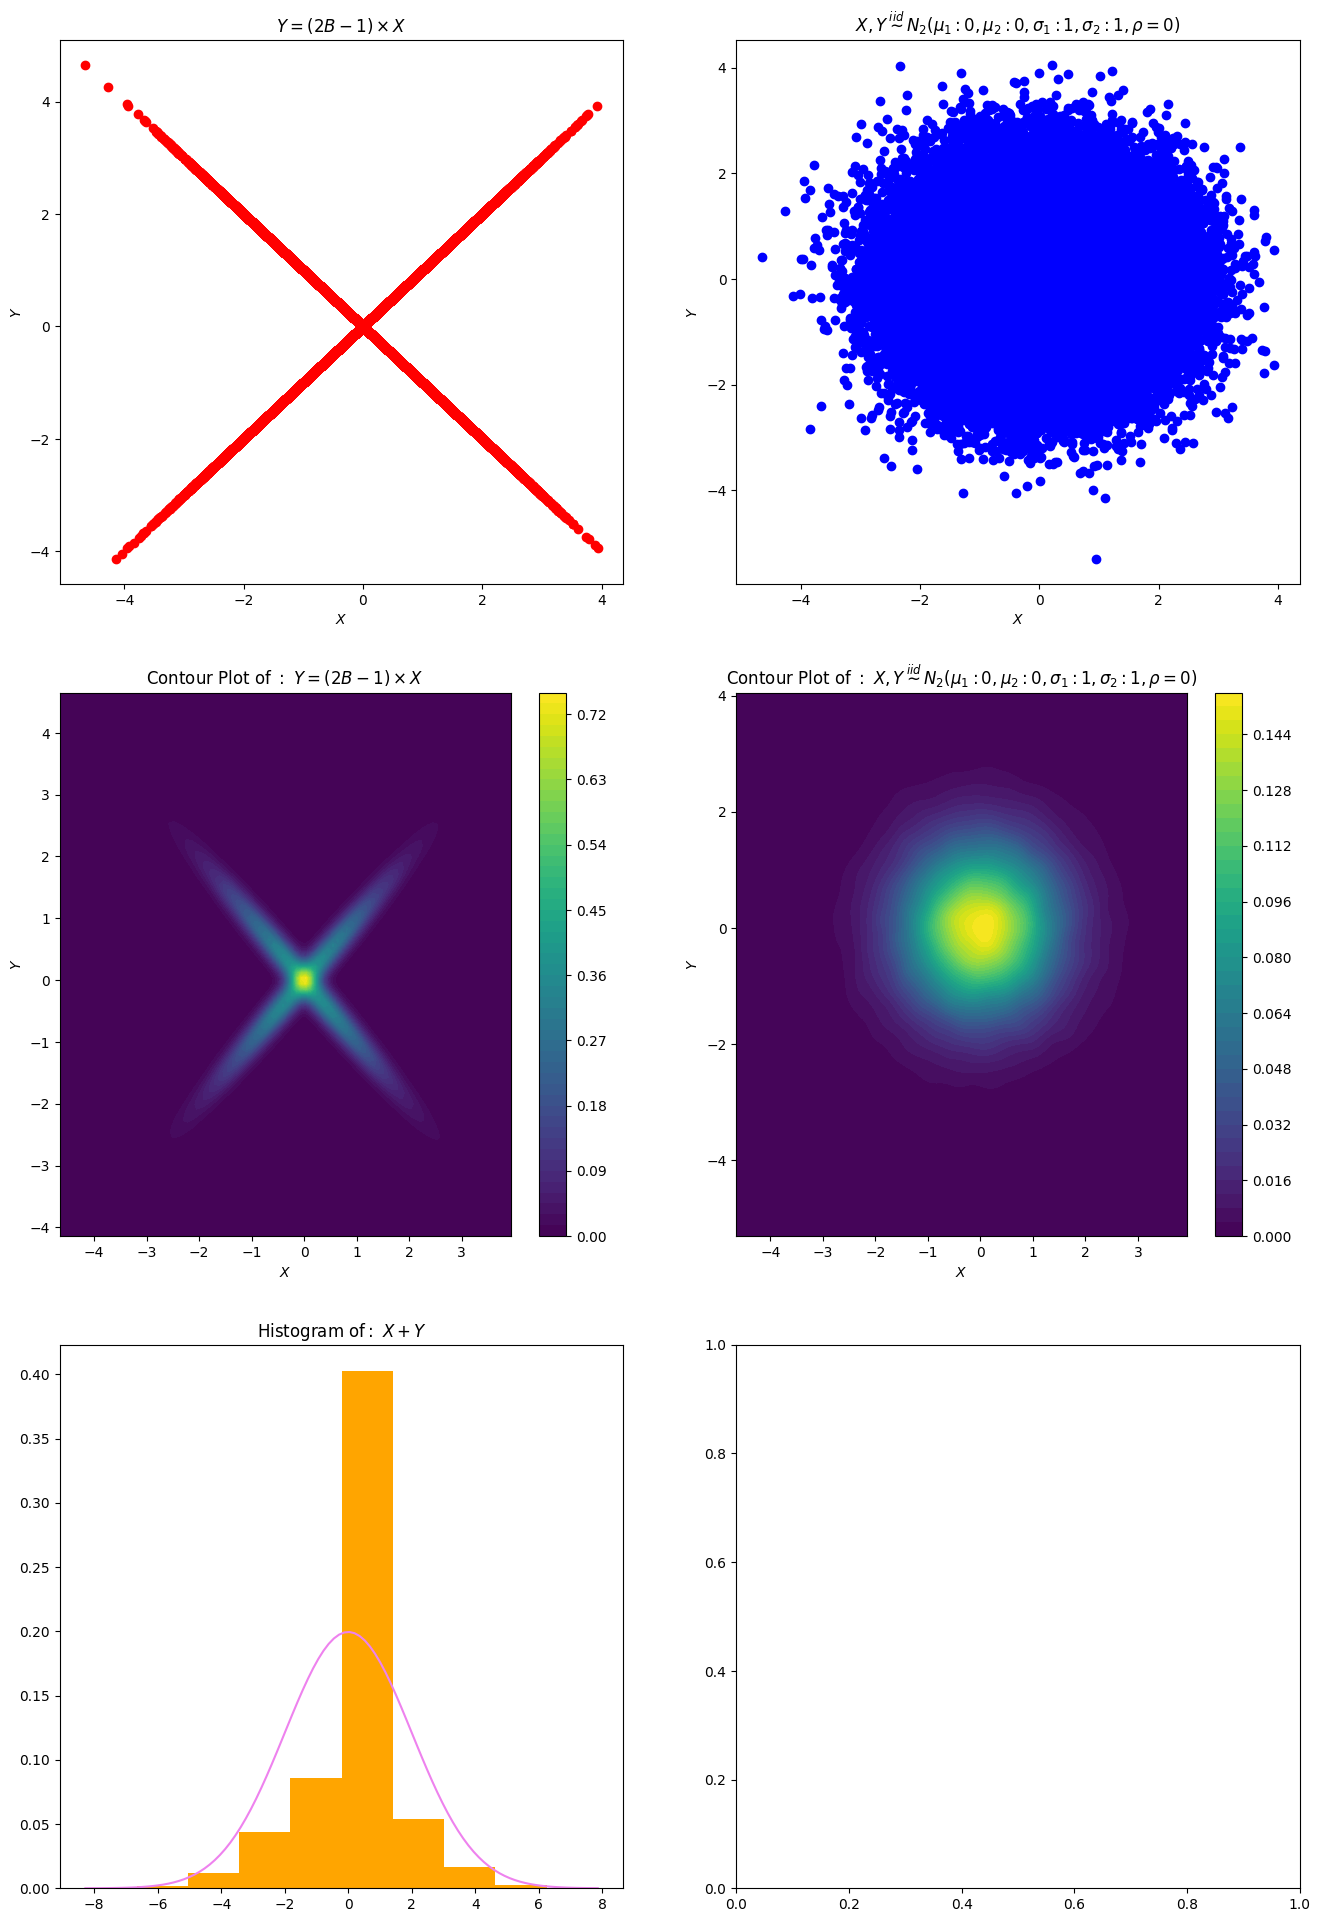

In [35]:
mysim.get_plot()